In [1]:
!apt-get update
!apt-get install -y cmake build-essential pkg-config

!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git

!mkdir -p opencv/build
%cd opencv/build
!cmake -D CMAKE_BUILD_TYPE=RELEASE \
        -D CMAKE_INSTALL_PREFIX=/usr/local \
        -D OPENCV_ENABLE_NONFREE=ON \
        -D OPENCV_EXTRA_MODULES_PATH=../../opencv_contrib/modules \
        -D BUILD_EXAMPLES=OFF ..
!make -j8
!make install


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,032 kB]
G

**Instructions:**
Complete the following tasks using OpenCV and relevant libraries in Python (e.g., OpenCV, scikit-image).
Each task should be implemented in a separate code block. Submit your Python script or notebook with
all cells executed, outputs displayed, and brief explanations describing your approach, observations, and
results.

# Machine Problem No. 3: Feature Extraction and Object Detection
**Objective:**

The objective of this machine problem is to implement and compare the three feature extraction methods
**(SIFT, SURF, and ORB)** in a single task. You will use these methods for feature matching between two
images, then perform image alignment using homography to warp one image onto the other.
Problem Description:
You are tasked with loading two images and performing the following steps:
1. Extract keypoints and descriptors from both images using **SIFT, SURF, and ORB.**
2. Perform feature matching between the two images using both **Brute-Force Matcher and FLANN**
Matcher.
3. Use the matched keypoints to calculate a **homography matrix** and align the two images.
4. Compare the performance of SIFT, SURF, and ORB in terms of feature matching accuracy and
speed.
You will submit your code, processed images, and a short report comparing the results.

## Step 1: Load Images
• Load two images of your choice that depict the same scene or object but from different angles.

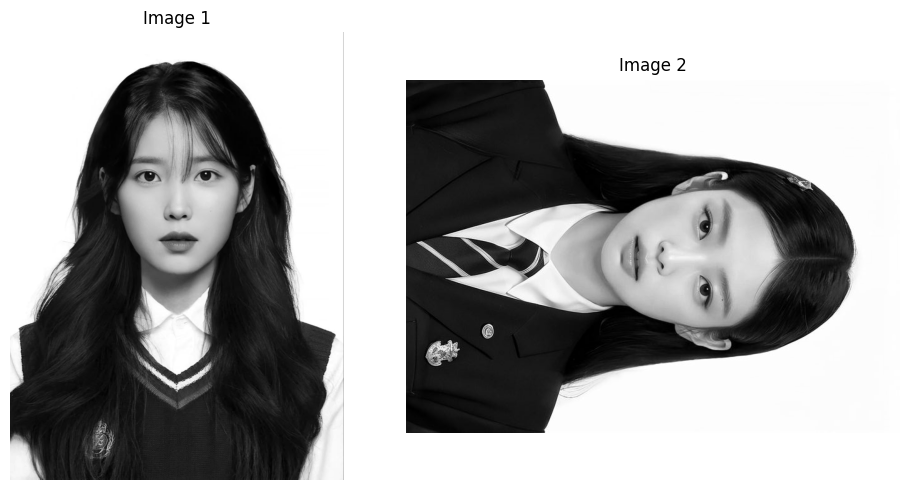

In [37]:
import cv2
import matplotlib.pyplot as plt
import os

IMAGE1_PATH = '/content/image1.jpg'
IMAGE2_PATH = '/content/image2.jpg'

# Load two images that depict the same scene or object from different angles
image1 = cv2.imread(IMAGE1_PATH, 0)  # Load the first image in grayscale
src = cv2.imread(IMAGE2_PATH, 0)  # Load the second image in grayscale
image2 = cv2.rotate(src, cv2.ROTATE_90_CLOCKWISE)
# Check if images are loaded correctly

plt.figure(figsize=(10, 5))

# Show first image
plt.subplot(1, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title('Image 1')
plt.axis('off')

# Show second image
plt.subplot(1, 2, 2)
plt.imshow(image2, cmap='gray')
plt.title('Image 2')
plt.axis('off')

plt.tight_layout()
plt.show()

## Step 2: Extract Keypoints and Descriptors Using SIFT, SURF, and ORB (30 points)
* Apply the SIFT algorithm to detect keypoints and compute descriptors for both images.
* Apply the SURF algorithm to do the same.
* Finally, apply ORB to extract keypoints and descriptors.

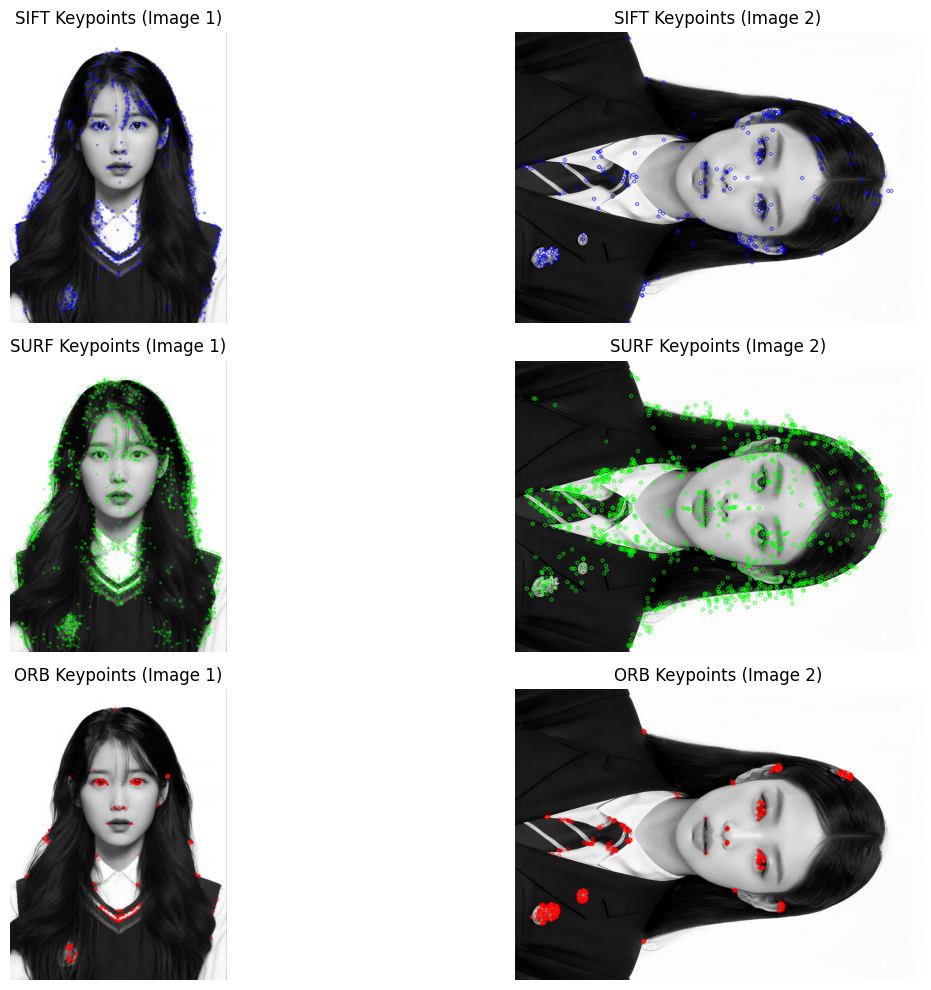

In [38]:
sift = cv2.SIFT_create()
keypoints1_sift, descriptors1_sift = sift.detectAndCompute(image1, None)
keypoints2_sift, descriptors2_sift = sift.detectAndCompute(image2, None)

surf = cv2.xfeatures2d.SURF_create()
keypoints1_surf, descriptors1_surf = surf.detectAndCompute(image1, None)
keypoints2_surf, descriptors2_surf = surf.detectAndCompute(image2, None)

orb = cv2.ORB_create()
keypoints1_orb, descriptors1_orb = orb.detectAndCompute(image1, None)
keypoints2_orb, descriptors2_orb = orb.detectAndCompute(image2, None)

image1_sift_keypoints = cv2.drawKeypoints(image1, keypoints1_sift, None, color=(255, 0, 0))
image2_sift_keypoints = cv2.drawKeypoints(image2, keypoints2_sift, None, color=(255, 0, 0))

image1_surf_keypoints = cv2.drawKeypoints(image1, keypoints1_surf, None, color=(0, 255, 0))
image2_surf_keypoints = cv2.drawKeypoints(image2, keypoints2_surf, None, color=(0, 255, 0))

image1_orb_keypoints = cv2.drawKeypoints(image1, keypoints1_orb, None, color=(0, 0, 255))
image2_orb_keypoints = cv2.drawKeypoints(image2, keypoints2_orb, None, color=(0, 0, 255))

plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
plt.imshow(cv2.cvtColor(image1_sift_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints (Image 1)')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(cv2.cvtColor(image2_sift_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints (Image 2)')
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(cv2.cvtColor(image1_surf_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SURF Keypoints (Image 1)')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(cv2.cvtColor(image2_surf_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SURF Keypoints (Image 2)')
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(cv2.cvtColor(image1_orb_keypoints, cv2.COLOR_BGR2RGB))
plt.title('ORB Keypoints (Image 1)')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(cv2.cvtColor(image2_orb_keypoints, cv2.COLOR_BGR2RGB))
plt.title('ORB Keypoints (Image 2)')
plt.axis('off')

plt.tight_layout()
plt.show()

## Step 3: Feature Matching with Brute-Force and FLANN

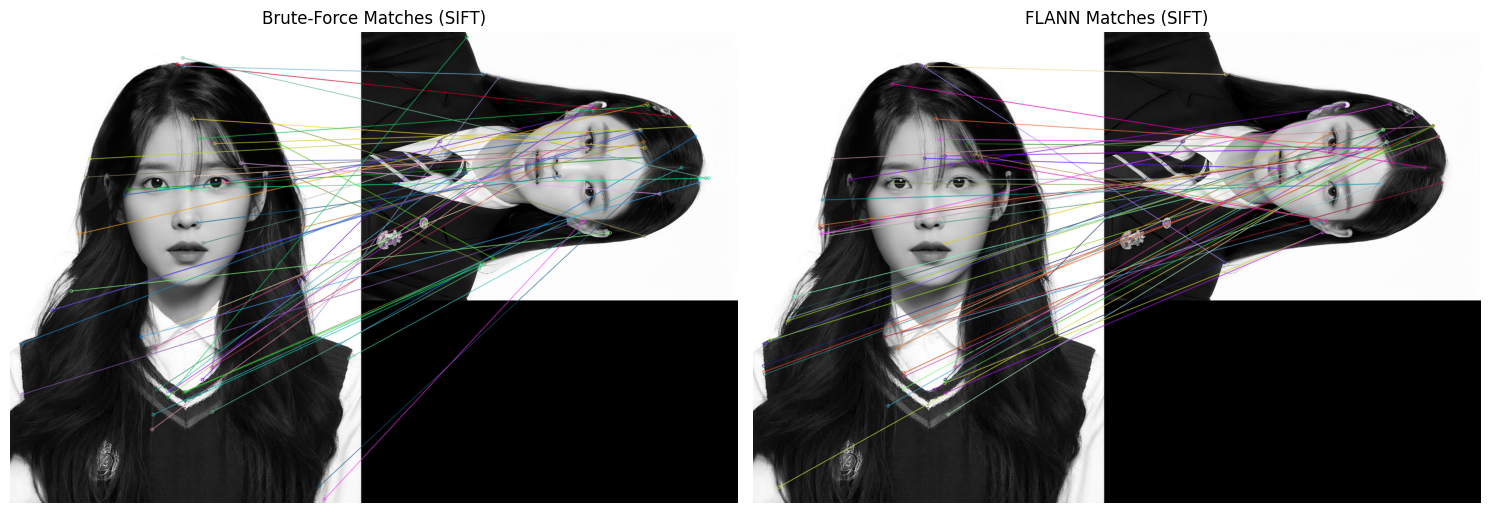

In [39]:
# Brute-Force Matcher with SIFT
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)  # NORM_L2 for SIFT and crossCheck for more accuracy
matches_bf = bf.match(descriptors1_sift, descriptors2_sift)
matches_bf = sorted(matches_bf, key=lambda x: x.distance)  # Sort by distance

# FLANN Matcher with SIFT
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)  # Specifies how many times the tree will be recursively traversed

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches_flann = flann.knnMatch(descriptors1_sift, descriptors2_sift, k=2)

# Apply ratio test for FLANN matching (Lowe's ratio test)
good_matches_flann = []
for m, n in matches_flann:
    if m.distance < 0.7 * n.distance:
        good_matches_flann.append(m)

# Draw the matches for Brute-Force
image_bf_matches = cv2.drawMatches(image1, keypoints1_sift, image2, keypoints2_sift, matches_bf[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Draw the matches for FLANN
image_flann_matches = cv2.drawMatches(image1, keypoints1_sift, image2, keypoints2_sift, good_matches_flann[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the results
plt.figure(figsize=(15, 10))

# Brute-Force Matches
plt.subplot(1, 2, 1)
plt.imshow(image_bf_matches)
plt.title('Brute-Force Matches (SIFT)')
plt.axis('off')

# FLANN Matches
plt.subplot(1, 2, 2)
plt.imshow(image_flann_matches)
plt.title('FLANN Matches (SIFT)')
plt.axis('off')

plt.tight_layout()
plt.show()

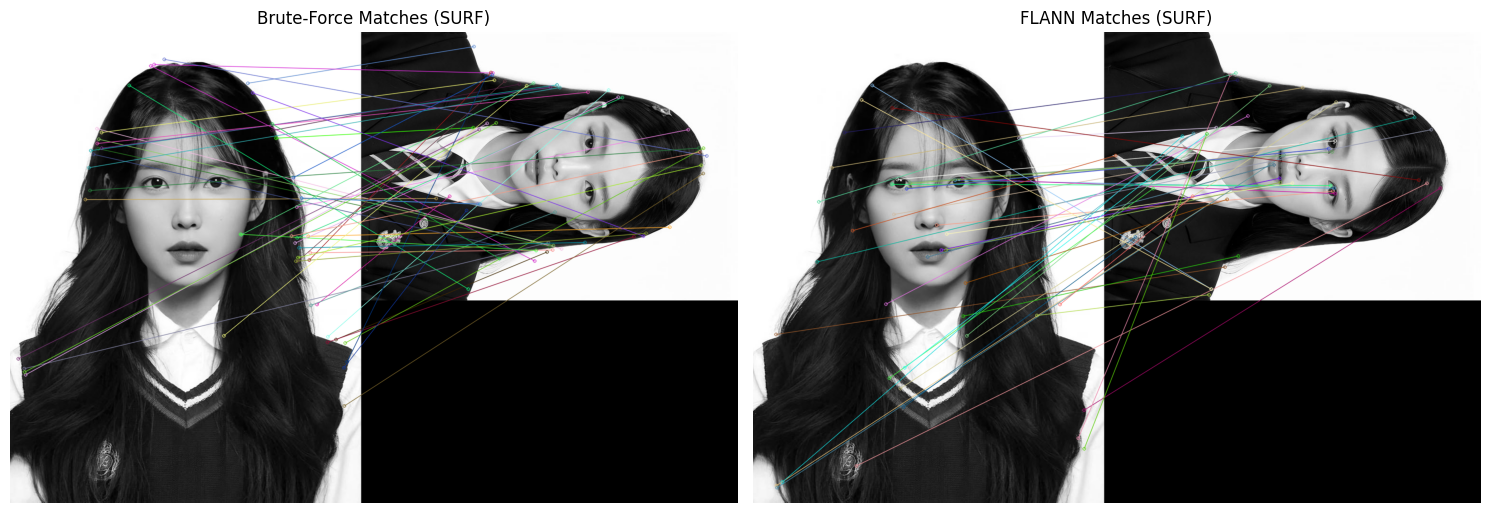

In [40]:
# Brute-Force Matcher with SIFT
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)  # NORM_L2 for SIFT and crossCheck for more accuracy
matches_bf = bf.match(descriptors1_surf, descriptors2_surf)
matches_bf = sorted(matches_bf, key=lambda x: x.distance)  # Sort by distance

# FLANN Matcher with SIFT
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)  # Specifies how many times the tree will be recursively traversed

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches_flann = flann.knnMatch(descriptors1_surf, descriptors2_surf, k=2)

# Apply ratio test for FLANN matching (Lowe's ratio test)
good_matches_flann = []
for m, n in matches_flann:
    if m.distance < 0.7 * n.distance:
        good_matches_flann.append(m)

# Draw the matches for Brute-Force
image_bf_matches = cv2.drawMatches(image1, keypoints1_surf, image2, keypoints2_surf, matches_bf[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Draw the matches for FLANN
image_flann_matches = cv2.drawMatches(image1, keypoints1_surf, image2, keypoints2_surf, good_matches_flann[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the results
plt.figure(figsize=(15, 10))

# Brute-Force Matches
plt.subplot(1, 2, 1)
plt.imshow(image_bf_matches)
plt.title('Brute-Force Matches (SURF)')
plt.axis('off')

# FLANN Matches
plt.subplot(1, 2, 2)
plt.imshow(image_flann_matches)
plt.title('FLANN Matches (SURF)')
plt.axis('off')

plt.tight_layout()
plt.show()

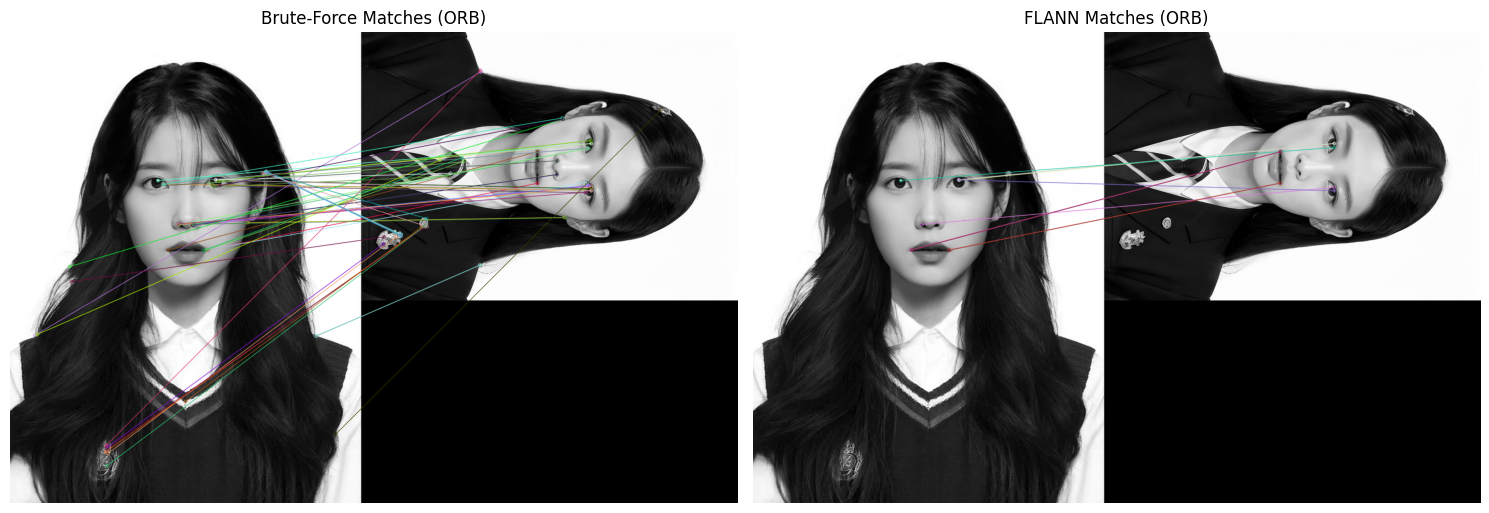

In [41]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches_bf = bf.match(descriptors1_orb, descriptors2_orb)
matches_bf = sorted(matches_bf, key=lambda x: x.distance)

FLANN_INDEX_LSH = 6
index_params = dict(algorithm=FLANN_INDEX_LSH, table_number=6, key_size=12, multi_probe_level=1)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches_flann = flann.knnMatch(descriptors1_orb, descriptors2_orb, k=2)

good_matches_flann = []
for match in matches_flann:
    if len(match) == 2:
        m, n = match
        if m.distance < 0.7 * n.distance:
            good_matches_flann.append(m)

image_bf_matches = cv2.drawMatches(image1, keypoints1_orb, image2, keypoints2_orb, matches_bf[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

image_flann_matches = cv2.drawMatches(image1, keypoints1_orb, image2, keypoints2_orb, good_matches_flann[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.imshow(image_bf_matches)
plt.title('Brute-Force Matches (ORB)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_flann_matches)
plt.title('FLANN Matches (ORB)')
plt.axis('off')

plt.tight_layout()
plt.show()

## Step 4: Image Alignment Using Homography

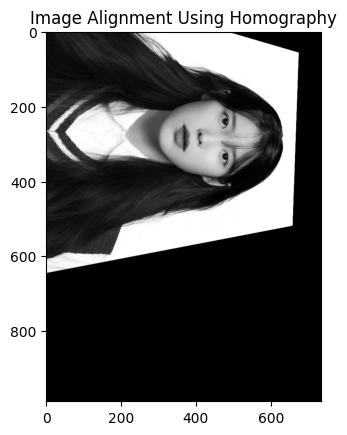

In [43]:
src_pts = np.float32(
    [keypoints1_orb[m.queryIdx].pt for m in good_matches_flann]
).reshape(-1,1,2)
dst_pts = np.float32(
    [keypoints2_orb[m.trainIdx].pt for m in good_matches_flann]
).reshape(-1,1,2)

M, masl = cv2.findHomography(src_pts,dst_pts, cv2.RANSAC,5.0)

h,w = image1.shape

result = cv2.warpPerspective(image1, M, (w,h))

plt.imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))
plt.title("Image Alignment Using Homography")
plt.show()

## Step 5: Performance Analysis

SIFT is highly accurate for keypoint detection in complex images, it is very computationally expensive. SURF is an abbreviation for Speeded-Up Robust Features that is faster and better suited for use in real time. Overall, Oriented FAST and Rotated BRIEF is the fastest algorithm to date, but struggles with scale variation and illumination changes, which result in lesser accuracy regarding keypoint detection. SURF has more key points than the others because it makes use of Hessian matrix for its detector. Thus, in real time, features can be matched faster. ORB is fast in speed compared to SIFT and SURF because it utilized FAST keypoint detector and BRIEF descriptor. The latter, SIFT, is the slowest simply because its computation is complex. Brute-Force Matcher and FLANN Matcher vary in strengths when used for feature matching. In high-precision applications, SIFT in combination with Brute-Force Matcher is the best solution. ORB combined with FLANN Matcher offers the best speed and efficiency trading with some accuracy loss.